# Function Generation for the Training of λ-Nets

## Specitication of Experiment Settings

In [417]:
from sklearn.datasets import load_iris, load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from utilities.DecisionTree_BASIC import SDT
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
from matplotlib import pyplot as plt

import numpy as np
import torch
np.set_printoptions(suppress=True)
torch.set_printoptions(sci_mode=False)

In [336]:
X, y = load_breast_cancer(return_X_y=True)

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)



In [368]:
X, y = load_iris(return_X_y=True)

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [369]:
X_train.shape

(100, 4)

In [370]:
y_test.shape

(50,)

In [371]:
tree= SDT(input_dim=X_train.shape[1], 
          output_dim=int(max(y_train))+1, 
          depth=1,
          use_cuda=False)

In [372]:
tree

SDT(
  (inner_nodes): Sequential(
    (0): Linear(in_features=5, out_features=1, bias=False)
    (1): Sigmoid()
  )
  (leaf_nodes): Linear(in_features=2, out_features=3, bias=False)
  (criterion): CrossEntropyLoss()
)

In [373]:
tree.fit(X_train, y_train, batch_size=32, epochs=10)

  0%|          | 0/10 [00:00<?, ?it/s]

X tensor([[1.0000, 0.3889, 0.3750, 0.5424, 0.5000],
        [1.0000, 0.9167, 0.4167, 0.9492, 0.8333],
        [1.0000, 0.3611, 0.4167, 0.5932, 0.5833],
        [1.0000, 0.2222, 0.6250, 0.0678, 0.0417],
        [1.0000, 0.9444, 0.3333, 0.9661, 0.7917],
        [1.0000, 0.4167, 0.2917, 0.5254, 0.3750],
        [1.0000, 0.2500, 0.5833, 0.0678, 0.0417],
        [1.0000, 0.1944, 0.6250, 0.0508, 0.0833],
        [1.0000, 0.2222, 0.7500, 0.1525, 0.1250],
        [1.0000, 0.1944, 0.0000, 0.4237, 0.3750],
        [1.0000, 0.5556, 0.2917, 0.6610, 0.7083],
        [1.0000, 0.1389, 0.5833, 0.1525, 0.0417],
        [1.0000, 0.1944, 0.4167, 0.1017, 0.0417],
        [1.0000, 0.2222, 0.5417, 0.1186, 0.1667],
        [1.0000, 0.3611, 0.2917, 0.5424, 0.5000],
        [1.0000, 0.2222, 0.5833, 0.0847, 0.0417],
        [1.0000, 0.3889, 0.4167, 0.5424, 0.4583],
        [1.0000, 0.9444, 0.7500, 0.9661, 0.8750],
        [1.0000, 0.0833, 0.5000, 0.0678, 0.0417],
        [1.0000, 0.5278, 0.3750, 0.5593, 0.5000]

In [374]:
tree.evaluate(X_test, y_test)

X tensor([[1.0000, 0.5000, 0.3333, 0.6271, 0.4583],
        [1.0000, 0.3889, 0.7500, 0.1186, 0.0833],
        [1.0000, 0.9444, 0.2500, 1.0000, 0.9167],
        [1.0000, 0.4722, 0.3750, 0.5932, 0.5833],
        [1.0000, 0.6944, 0.3333, 0.6441, 0.5417],
        [1.0000, 0.3056, 0.5833, 0.0847, 0.1250],
        [1.0000, 0.3611, 0.3750, 0.4407, 0.5000],
        [1.0000, 0.7222, 0.4583, 0.6949, 0.9167],
        [1.0000, 0.5278, 0.0833, 0.5932, 0.5833],
        [1.0000, 0.4167, 0.2917, 0.4915, 0.4583],
        [1.0000, 0.6111, 0.5000, 0.6949, 0.7917],
        [1.0000, 0.1389, 0.4167, 0.0678, 0.0000],
        [1.0000, 0.3333, 0.6250, 0.0508, 0.0417],
        [1.0000, 0.1667, 0.4583, 0.0847, 0.0000],
        [1.0000, 0.2222, 0.7500, 0.0847, 0.0833],
        [1.0000, 0.5556, 0.5417, 0.6271, 0.6250],
        [1.0000, 0.6111, 0.4167, 0.8136, 0.8750],
        [1.0000, 0.3611, 0.2083, 0.4915, 0.4167],
        [1.0000, 0.3889, 0.3333, 0.5932, 0.5000],
        [1.0000, 0.5833, 0.3333, 0.7797, 0.8750]

0.32

In [384]:
tree.inner_nodes[0].weight

Parameter containing:
tensor([[ 0.2045, -0.0079,  0.1458,  0.0266, -0.4834]], requires_grad=True)

In [383]:
tree.leaf_nodes.weight

Parameter containing:
tensor([[ 0.2067, -0.2090],
        [ 0.1218,  0.3181],
        [-0.2724,  0.8444]], requires_grad=True)

In [382]:
index = 0
#print(X_test[index:index+1])
tree.predict(X_test[index:index+1])

X tensor([[1.0000, 0.5000, 0.3333, 0.6271, 0.4583]])
path_prob tensor([[0.5111]], grad_fn=<SigmoidBackward>)
path_prob tensor([[[0.5111]]], grad_fn=<UnsqueezeBackward0>)
path_prob tensor([[[0.5111, 0.4889]]], grad_fn=<CatBackward>)
_mu tensor([[[1.]]])
_penalty tensor(0.)
mu tensor([[0.5111, 0.4889]], grad_fn=<ViewBackward>)
_mu, _penalty tensor([[0.5111, 0.4889]], grad_fn=<ViewBackward>) tensor(0.0014, grad_fn=<AddBackward0>)
y_pred tensor([[0.0034, 0.2178, 0.2736]], grad_fn=<MmBackward>)
output tensor([[0.2817, 0.3491, 0.3692]], grad_fn=<SoftmaxBackward>)
pred tensor([2])


tensor([2])

In [375]:
index = 1

m1 = torch.FloatTensor(X_test[index:index+1])
print(m1.shape)
print(m1)

m1_new = torch.reshape(torch.cat((torch.FloatTensor([1]), m1[0])), (1, torch.cat((torch.FloatTensor([1]), m1[0])).shape[0]))
print(m1_new.shape)
print(m1_new)

m2=tree.inner_nodes[0].weight
print(m2.shape)
print(m2)

m3 = tree.leaf_nodes.weight
print(m3.shape)
print(m3)

torch.Size([1, 4])
tensor([[0.3889, 0.7500, 0.1186, 0.0833]])
torch.Size([1, 5])
tensor([[1.0000, 0.3889, 0.7500, 0.1186, 0.0833]])
torch.Size([1, 5])
Parameter containing:
tensor([[ 0.2045, -0.0079,  0.1458,  0.0266, -0.4834]], requires_grad=True)
torch.Size([3, 2])
Parameter containing:
tensor([[ 0.2067, -0.2090],
        [ 0.1218,  0.3181],
        [-0.2724,  0.8444]], requires_grad=True)


In [385]:
adjust_index = 3

m2_custom = torch.FloatTensor([[0 for i in range(X_train.shape[1]+1)]])
m2_custom[0][1+adjust_index] = 1
print(m2_custom.shape)
print(m2_custom)

m2 = m2_custom

print(m1[0][adjust_index])

torch.Size([1, 5])
tensor([[0., 0., 0., 0., 1.]])
tensor(0.0833)


In [415]:
adjust_index = 3

m1_custom = torch.FloatTensor([[0 for i in range(X_train.shape[1]+1)]])
m1_custom[0][0] = 0#1
m1_custom[0][1+adjust_index] = 3
print(m1_custom.shape)
print(m1_custom)

m1_new = m1_custom


print(m1[0][adjust_index])

torch.Size([1, 5])
tensor([[0., 0., 0., 0., 3.]])
tensor(0.0833)


In [413]:
m3 = torch.FloatTensor([[2,0], [1,0], [0,1]]) #niedrige werte in erstem array (stehen für klasse 0) stehen für geringe wahrscheinlichkeit dieser klasse

In [398]:
m2

tensor([[0., 0., 0., 0., 1.]])

In [399]:
torch.matmul(m2[0], m1_new[0])

tensor(-3.)

In [400]:
import math

def sigmoid(x):
    return 1 / (1 + math.exp(-x))

In [408]:
sigmoid(1)

0.7310585786300049

In [402]:
0.3168 * -1.6799 + 0.6832 * 1.0056

0.15483360000000002

In [403]:
0.3168 * 1.1978 + 0.6832 * -0.6925

-0.09365296000000001

In [416]:
#output = torch.stack([torch.stack([torch.sigmoid(torch.matmul(m1[0], m2[0][1:])+m2[0][0])])])
print(m2[0]) # input
print(m1_new[0]) # filter
output = torch.stack([torch.stack([torch.sigmoid(torch.matmul(m2[0], m1_new[0]))])])
print(output)
output = torch.unsqueeze(output, dim=2)
print(output)
output = torch.cat((output, 1 - output), dim=2)
print(output)
print(m3) #output distrib
output = torch.stack([torch.matmul(m3, output[0][0])])
print(output)
output = torch.softmax(output, dim=1)
print(output)
output = output.data.max(1)[1]
print(output)

tensor([0., 0., 0., 0., 1.])
tensor([0., 0., 0., 0., 3.])
tensor([[0.9526]])
tensor([[[0.9526]]])
tensor([[[0.9526, 0.0474]]])
tensor([[2., 0.],
        [1., 0.],
        [0., 1.]])
tensor([[1.9051, 0.9526, 0.0474]])
tensor([[0.6486, 0.2502, 0.1012]])
tensor([0])


In [354]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [355]:
import copy
tree_copy = copy.deepcopy(tree)

In [356]:
adjust_index = 3

m2_custom = torch.FloatTensor([[0 for i in range(X_train.shape[1]+1)]])
m2_custom[0][1+adjust_index] = -2
print(m2_custom.shape)
print(m2_custom)

m2 = m2_custom

print(m1[0][adjust_index])

torch.Size([1, 31])
tensor([[ 0.,  0.,  0.,  0.,  0.,  0., -2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.]])
tensor(0.2562)


In [357]:
tree_copy.inner_nodes[0].weight = torch.nn.Parameter(m2_custom)
print(tree_copy.inner_nodes[0].weight)

Parameter containing:
tensor([[ 0.,  0.,  0.,  0.,  0.,  0., -2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.]], requires_grad=True)


In [358]:
tree_copy.leaf_nodes.weight = torch.nn.Parameter(torch.FloatTensor([[-1,1], [1,-1]]))

In [359]:
sigmoid(0.2562*2)

0.6253689217509387

In [360]:
%autoreload 2
index = 1
tree_copy.predict(X_test[index:index+1])

X tensor([[1.0000, 0.5660, 0.3923, 0.5515, 0.4185, 0.3382, 0.2562, 0.2530, 0.3952,
         0.2636, 0.0979, 0.2453, 0.0966, 0.2228, 0.1667, 0.0928, 0.1072, 0.0573,
         0.2595, 0.0841, 0.0277, 0.6023, 0.3881, 0.5752, 0.4131, 0.3178, 0.2002,
         0.2146, 0.6148, 0.1944, 0.0712]])
path_prob tensor([[0.3746]], grad_fn=<SigmoidBackward>)
path_prob tensor([[[0.3746]]], grad_fn=<UnsqueezeBackward0>)
path_prob tensor([[[0.3746, 0.6254]]], grad_fn=<CatBackward>)
_mu tensor([[[1.]]])
_penalty tensor(0.)
mu tensor([[0.3746, 0.6254]], grad_fn=<ViewBackward>)
_mu, _penalty tensor([[0.3746, 0.6254]], grad_fn=<ViewBackward>) tensor(0.0015, grad_fn=<AddBackward0>)
y_pred tensor([[ 0.2507, -0.2507]], grad_fn=<MmBackward>)
output tensor([[0.6228, 0.3772]], grad_fn=<SoftmaxBackward>)
pred tensor([0])


tensor([0])

In [361]:
np.array([-0.4566, 0.3367])

array([-0.4566,  0.3367])

In [362]:
t1 = torch.FloatTensor([[-0.4566, 0.3367]])

In [363]:
torch.softmax(t1, dim=1)

tensor([[0.3115, 0.6885]])

In [14]:
print(tree.inner_nodes[0].weight.shape)
print(tree.inner_nodes[0].weight)

torch.Size([1, 31])
Parameter containing:
tensor([[     1.1772,     -0.3000,      0.0800,     -0.3395,     -0.7517,
              0.5855,     -0.7385,     -0.8359,     -0.8157,      0.3731,
              1.0316,     -0.7876,      0.8337,     -0.7924,     -0.7718,
              0.7262,      0.1253,      0.0008,     -0.0330,      0.7403,
              0.4842,     -0.7485,     -0.1601,     -0.6389,     -0.9872,
              0.1348,     -0.8633,     -1.0038,     -0.8467,     -0.3212,
              0.1595]], requires_grad=True)


In [15]:
print(tree.leaf_nodes.weight.shape)
print(tree.leaf_nodes.weight)

torch.Size([2, 2])
Parameter containing:
tensor([[-1.6799,  1.0056],
        [ 1.1978, -0.6925]], requires_grad=True)


In [16]:
from sklearn.tree import DecisionTreeClassifier

normal_tree = DecisionTreeClassifier(max_depth=1)
normal_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=1)

In [17]:
preds = normal_tree.predict(X_test)
print(accuracy_score(y_test, preds))

0.8882978723404256


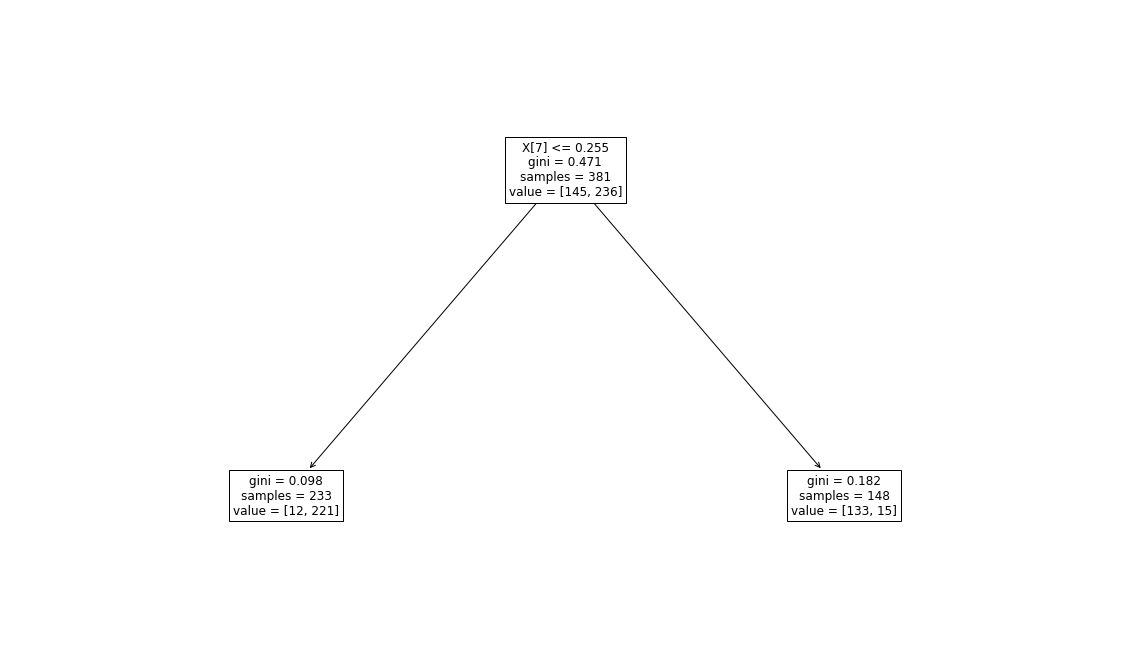

In [18]:
plt.figure(figsize=(20,12))
plot_tree(normal_tree, fontsize=12)

plt.show()

In [19]:
#######################################################################################################################################
###################################################### CONFIG FILE ####################################################################
#######################################################################################################################################
sleep_time = 0 #minutes


config = {
    'function_family': {
        'maximum_depth': 3,
        'fully_grown': True,       
        'balance': 0.5
        'balancing_tolerance': 0.05               
    }
    'data': {
        'number_of_variables': 3, 
        'num_classes': 2,
        
        'function_generation_type': 'make_classification', #'random'
        'objective': 'classification' # 'multiclass_classification', 'regression'
        
        'x_max': 1,
        'x_min': 0,
        'x_distrib': 'uniform', #'normal', 'uniform',       
        
        'same_training_all_lambda_nets': False,
        
        'lambda_dataset_size': 5000, #number of samples per polynomial
        'number_of_generated_datasets': 10000,
    }, 
    'computation':{
        'n_jobs': 5,
        'use_gpu': False,
        'gpu_numbers': '0',
        'RANDOM_SEED': 0,   
    }
}


SyntaxError: invalid syntax (<ipython-input-19-8001cb5b0483>, line 12)

In [ ]:
#######################################################################################################################################
########################################### IMPORT GLOBAL VARIABLES FROM CONFIG #######################################################
#######################################################################################################################################
globals().update(config['data'])
globals().update(config['computation'])

## Imports

In [ ]:
from itertools import product       # forms cartesian products
from more_itertools import random_product 
from tqdm import tqdm_notebook as tqdm
import pickle

import numpy as np

import pandas as pd
from joblib import Parallel, delayed

import random 
from random import sample 

import os
import sys

from sklearn.datasets import make_regression
from sklearn.preprocessing import MinMaxScaler

from sympy import Symbol, sympify

        
import seaborn as sns
        
import random 

import warnings

from time import perf_counter

In [ ]:
#######################################################################################################################################
###################################################### SET VARIABLES + DESIGN #########################################################
#######################################################################################################################################
sns.set_style("darkgrid")

random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)
    
    
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_columns', 500)

warnings.filterwarnings('ignore')

In [ ]:
from utilities.utility_functions import *
#######################################################################################################################################
####################################################### CONFIG ADJUSTMENTS ############################################################
#######################################################################################################################################

    
#######################################################################################################################################
################################################## UPDATE VARIABLES ###################################################################
#######################################################################################################################################
globals().update(config['data'])
globals().update(config['computation'])

initialize_utility_functions_config_from_curent_notebook(config)

#######################################################################################################################################
###################################################### PATH + FOLDER CREATION #########################################################
#######################################################################################################################################
globals().update(generate_paths(path_type='data_creation'))
generate_directory_structure()

#######################################################################################################################################
############################################################ SLEEP TIMER ##############################################################
#######################################################################################################################################
sleep_minutes(sleep_time)

In [ ]:
print(path_identifier_polynomial_data)

# Function Generation

In [ ]:
def generate_random_decision_tree():
    
    
    
number_of_variables,
maximum_depth,
num_classes,
fully_grown
    

In [ ]:
def generate_decision_tree_data(n_samples, noise, noise_dist, seed):
    
    decision_tree = generate_random_decision_tree()
    
    return decision_tree, X_data, y_data

In [ ]:
if same_training_all_lambda_nets:
    parallel = Parallel(n_jobs=n_jobs, verbose=3, backend='multiprocessing')
    result_list = parallel(delayed(generate_decision_tree_data)(polynomial_array=list_of_polynomials[i], 
                                                               n_samples=lambda_dataset_size,
                                                               noise=noise,
                                                               noise_dist=noise_distrib, 
                                                               seed=RANDOM_SEED, 
                                                               sympy_calculation=False) for i in range(polynomial_data_size))  
else:
    parallel = Parallel(n_jobs=n_jobs, verbose=3, backend='multiprocessing')
    result_list = parallel(delayed(gen_regression_symbolic)(polynomial_array=list_of_polynomials[i], 
                                                               n_samples=lambda_dataset_size,
                                                               noise=noise,
                                                               noise_dist=noise_distrib, 
                                                               seed=RANDOM_SEED+i, 
                                                               sympy_calculation=False) for i in range(polynomial_data_size))

X_data_list = [[pd.Series(result[0],  index=list_of_monomial_identifiers_string), pd.DataFrame(result[1], columns=list(variables[:n]))] for result in result_list]
y_data_list = [[pd.Series(result[0],  index=list_of_monomial_identifiers_string), pd.DataFrame(result[2], columns=['result'])] for result in result_list]



In [ ]:
X_data_list[0][0].head(10)

In [ ]:
X_data_list[0][1].head(10)

In [ ]:
y_data_list[0][0].head(10)

In [ ]:
y_data_list[0][1].head(10)

In [ ]:
path_polynomials = './data/saved_polynomial_lists/polynomials_sample_' + path_identifier_polynomial_data + '.csv'
polynomials_list_df.to_csv(path_polynomials, index=False)

path_X_data = './data/saved_polynomial_lists/X_sample_' + path_identifier_polynomial_data + '.pkl'
with open(path_X_data, 'wb') as f:
    pickle.dump(X_data_list, f)#, protocol=2)
    
path_y_data = './data/saved_polynomial_lists/y_sample_' + path_identifier_polynomial_data + '.pkl'
with open(path_y_data, 'wb') as f:
    pickle.dump(y_data_list, f)#, protocol=2)
